<a href="https://colab.research.google.com/github/king-bubli/Stock-Market-Prediction/blob/main/Stock_Market_Predictions_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Necessary Libraries**

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

### **Reading the DataSet**

In [17]:
df = pd.read_csv('/content/upload_DJIA_table.csv')

### **Displaying the information of the DataFrame**

In [18]:
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB
None


## **Pre-processing the data**

### **Replacing index with Date coloumn**

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

### **Feature Engineering**

In [20]:
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Previous Close'] = df['Close'].shift(1)
df.dropna(inplace=True)

### **Separating the features and label from the dataframe**

In [21]:
X = df[['Day', 'Month', 'Year', 'Previous Close']] # Features
y = df['Close']                                    # Label

### **Splitting the data into training and testing sets**

### **10% of the data is used for testing**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

## **Preparing the model**

### **Creating an instance of the LinearRegression class**

In [23]:
model = LinearRegression()

### **Fitting the training data to the Random Forest model**

In [24]:
model.fit(X_train, y_train)

LinearRegression()

## **Evaluating the model**

### **Measuring the accuracy of the model over the training data**

In [26]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 15717.433379219694, MAE: 90.29282001169999


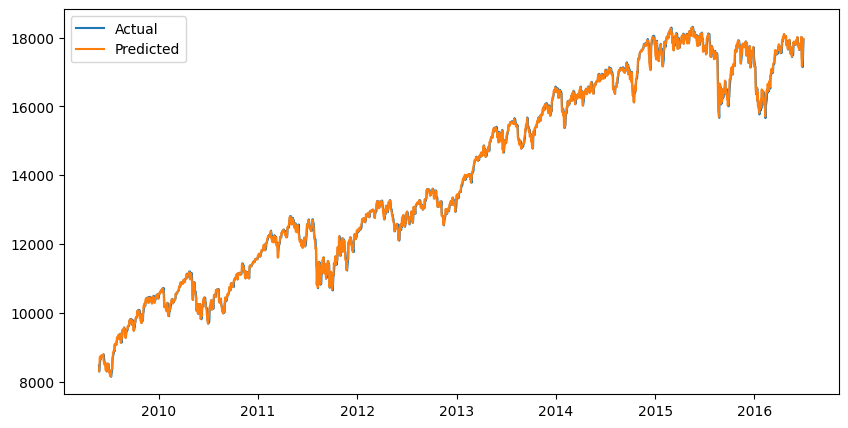

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(y_train.index, y_train, label='Actual')
plt.plot(y_train.index, y_pred, label='Predicted')
plt.legend()
plt.show()

### **Measuring the accuracy of the model over the testing data**

In [29]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 63664.602033565374, MAE: 186.25939540383882


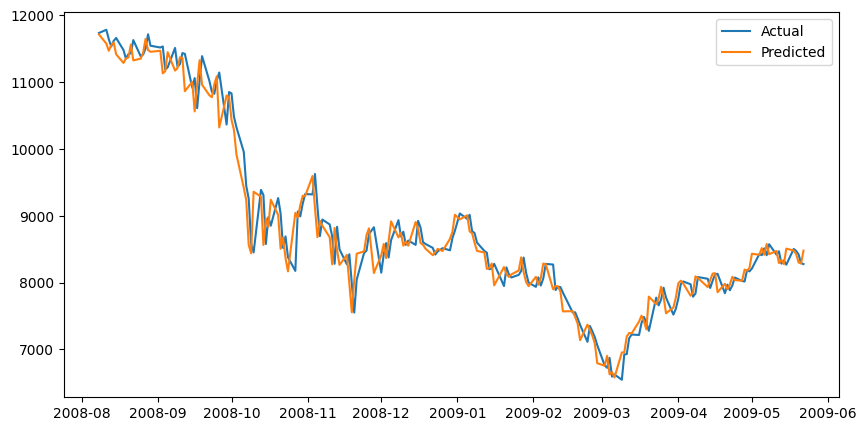

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()